<a href="https://colab.research.google.com/github/gabriela-data/DadosHepatiteC/blob/main/HepatiteC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -U pingouin
!pip install -U pandas-flavor==0.1.1
import math
import pandas as pd
import pandas_flavor as pf
import numpy as np
from numpy.testing import suppress_warnings
import numpy.linalg
import numpy.linalg._umath_linalg
#import numpy.linalg._umath_linalg._ilp64
import pingouin as pg
import sklearn
import scipy.stats as sct
from scipy.stats import norm
#from numpy.testing import suppr
from scipy import constants
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import tensorflow as tf

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.9/198.9 kB 1.8 MB/s eta 0:00:00
  Attempting uninstall: pandas-flavor
    Found existing installation: pandas-flavor 0.6.0
    Uninstalling pandas-flavor-0.6.0:
      Successfully uninstalled pandas-flavor-0.6.0


# Importando o Banco

## Importando arquivos do drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
datasetHepatiteC = pd.read_csv('/content/drive/MyDrive/HepatitisCdata.csv')

In [ ]:
datasetHepatiteC

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,611,3=Cirrhosis,62,f,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,612,3=Cirrhosis,64,f,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,613,3=Cirrhosis,64,f,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
613,614,3=Cirrhosis,46,f,33.0,NaN,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0


1.   Categoria/Tipo do paciente (Category)
2.   Exame de sangue de albumina (ALB)
3.   Fosfatase alcalina (ALP)
4.   Alanina Transaminase (ALT)
5.   Aspartato Transaminase (AST)
6.   Bilirrubina (BIL)
7.   Acetilcolinesterase (CHE)
8.   Colesterol (CHOL)
9.   Creatinina (CREA)
10.  Gama-Glutamil Transferase (GGT)
11.  Proteínas (PROT)






## Verificando as informações das variáveis do Banco

In [ ]:
datasetHepatiteC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  615 non-null    int64  
 1   Category    615 non-null    object 
 2   Age         615 non-null    int64  
 3   Sex         615 non-null    object 
 4   ALB         614 non-null    float64
 5   ALP         597 non-null    float64
 6   ALT         614 non-null    float64
 7   AST         615 non-null    float64
 8   BIL         615 non-null    float64
 9   CHE         615 non-null    float64
 10  CHOL        605 non-null    float64
 11  CREA        615 non-null    float64
 12  GGT         615 non-null    float64
 13  PROT        614 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 67.4+ KB


### Verificando número de linhas e colunas do dataset

In [ ]:
df = datasetHepatiteC

In [ ]:
df

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,611,3=Cirrhosis,62,f,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,612,3=Cirrhosis,64,f,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,613,3=Cirrhosis,64,f,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
613,614,3=Cirrhosis,46,f,33.0,NaN,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0


## Criando variáveis categóricas através de uma variável numérica(Contínua ou Discreta)

In [ ]:
def categorizar_tipo_paciente(codigo):
    if codigo == '0=Blood Donor':
        return 'Doador'
    elif codigo == '1=Hepatitis':
        return 'Hepatite'
    elif codigo == '2=Fibrosis':
        return 'Fibrose'
    elif codigo == '3=Cirrhosis':
        return 'Cirrose'

In [ ]:
df['CATCategory'] = df['Category'].apply(categorizar_tipo_paciente)
df

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,CATCategory
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0,Doador
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5,Doador
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3,Doador
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7,Doador
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7,Doador
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,611,3=Cirrhosis,62,f,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5,Cirrose
611,612,3=Cirrhosis,64,f,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3,Cirrose
612,613,3=Cirrhosis,64,f,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0,Cirrose
613,614,3=Cirrhosis,46,f,33.0,NaN,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0,Cirrose


## Salvando o Banco no Drive com as Variáveis Criadas

In [ ]:
#Banco com filtro, que contém apenas doadores com Hepatite C

df_hepatite_c = df[df['CATCategory'] == 'Hepatite']
print(df_hepatite_c)

     Unnamed: 0     Category  Age Sex   ALB    ALP   ALT    AST   BIL    CHE  \
540         541  1=Hepatitis   38   m  45.0   56.3   NaN   33.1   7.0   9.58   
541         542  1=Hepatitis   19   m  41.0    NaN  87.0   67.0  12.0   7.55   
542         543  1=Hepatitis   23   m  47.0   19.1  38.9  164.2  17.0   7.09   
543         544  1=Hepatitis   25   m  42.0   38.2  63.3  187.7  14.0   6.00   
544         545  1=Hepatitis   27   m  45.0   27.5  10.5   37.8  10.0   8.77   
545         546  1=Hepatitis   29   m  49.0    NaN  53.0   39.0  15.0   8.79   
546         547  1=Hepatitis   30   m  45.0    NaN  66.0   45.0  14.0  12.16   
547         548  1=Hepatitis   32   m  45.0   34.6  44.3   96.2  16.0  10.11   
548         549  1=Hepatitis   32   m  41.0   34.4  12.1   60.9   6.0  13.80   
549         550  1=Hepatitis   34   m  46.0   36.7   7.4   31.6   9.0   9.71   
550         551  1=Hepatitis   35   m  47.0   37.9  13.3   48.4   8.0  10.30   
551         552  1=Hepatitis   36   m  4

In [ ]:
#Salvando no Drive o Banco que contém apenas com Hepatite C

df_hepatite_c.to_csv('/content/drive/MyDrive/HepatitisC.csv')

In [ ]:
df_hepatite_c=pd.read_csv('/content/drive/MyDrive/HepatitisC.csv')
#df_hepatite_c

In [ ]:
#Salvando no Drive o Banco com variáveis criadas

df.to_csv('/content/drive/MyDrive/HepatitisCdataCat.csv')

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/HepatitisCdataCat.csv')

In [ ]:
#df

# **Calculando as Frequências**

## Frequências (Absoluta e Relativa) - Sexo

**Calculando a Frequência Absoluta do Sexo**

In [ ]:
# Frequência Absoluta do Sexo - Hepatite C

absolutSexHep = df_hepatite_c['Sex'].value_counts()
absolutSexHep

,count
Sex,
m,20
f,4


In [ ]:
#Frequência Absoluta do Sexo - Amostra Geral

absolutaSex = df['Sex'].value_counts()
absolutaSex

,count
Sex,
m,377
f,238


**Calculando a Frequência Relativa do Sexo**

In [ ]:
percentSex = round(df['Sex'].value_counts(normalize= True)*100, 2)
percentSex

,proportion
Sex,
m,61.3
f,38.7


In [ ]:
percentSexHep = round(df_hepatite_c['Sex'].value_counts(normalize= True)*100, 2)
percentSexHep

,proportion
Sex,
m,83.33
f,16.67


**Calculando a Frequência Absoluta do Tipo de Paciente**

In [ ]:
absolutCat = df['Category'].value_counts()
absolutCat

,count
Category,
0=Blood Donor,533
3=Cirrhosis,30
1=Hepatitis,24
2=Fibrosis,21
0s=suspect Blood Donor,7


**Calculando a Frequência Relativa do Tipo de Paciente**

In [ ]:
percentCat = round(df['Category'].value_counts(normalize = True)*100, 2)

In [ ]:
percentCat

,proportion
Category,
0=Blood Donor,86.67
3=Cirrhosis,4.88
1=Hepatitis,3.90
2=Fibrosis,3.41
0s=suspect Blood Donor,1.14


# Construindo Gráficos para entender o Comportamento das variáveis

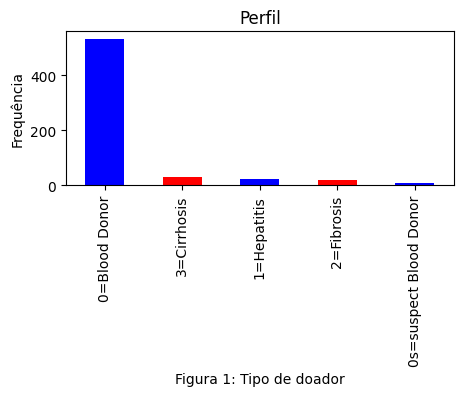

In [ ]:
plt.figure(figsize = [5,2])
df['Category'].value_counts().plot(kind = 'bar', color = ['blue', 'red'])
plt.title('Perfil')
plt.xlabel('Figura 1: Tipo de doador')
plt.ylabel('Frequência')
plt.show()

In [ ]:
df

,Unnamed: 0.1,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,CATCategory
0,0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0,Doador
1,1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5,Doador
2,2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3,Doador
3,3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7,Doador
4,4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7,Doador
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,610,611,3=Cirrhosis,62,f,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5,Cirrose
611,611,612,3=Cirrhosis,64,f,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3,Cirrose
612,612,613,3=Cirrhosis,64,f,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0,Cirrose
613,613,614,3=Cirrhosis,46,f,33.0,NaN,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0,Cirrose


## Gráfico de Variáveis Qualitativas

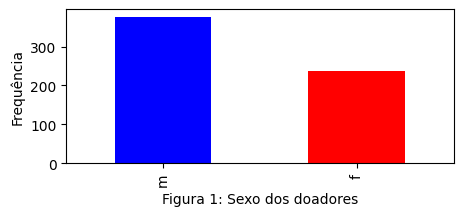

In [ ]:
plt.figure(figsize = [5,2])
df['Sex'].value_counts().plot(kind = 'bar', color = ['blue', 'red'])
#plt.title('Nível de Açucar no Sangue')
plt.xlabel('Figura 1: Sexo dos doadores')
plt.ylabel('Frequência')
plt.show()

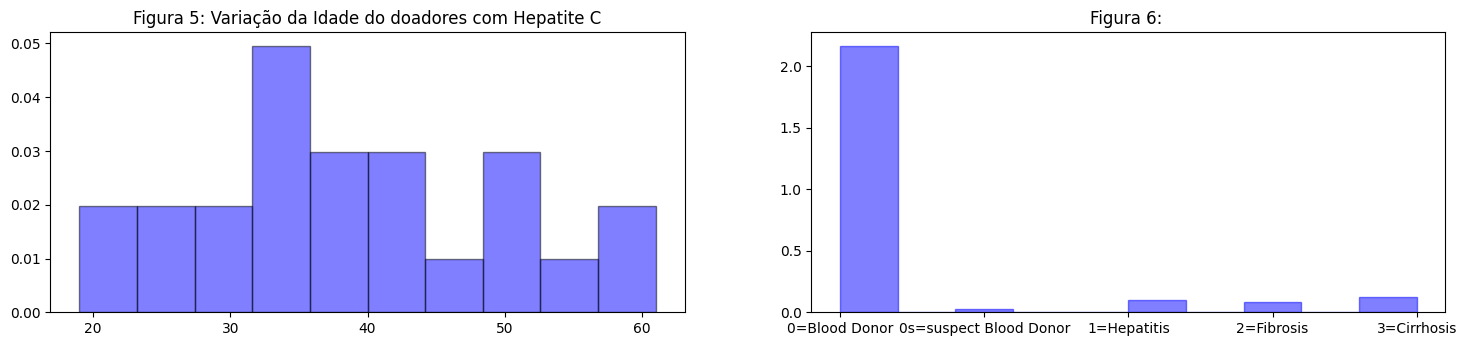

In [ ]:
plt.figure(figsize = (18,8))

plt.subplot(2,2,1)
plt.hist(data = df_hepatite_c, x ='Age', color='blue', histtype='bar', rwidth=2, edgecolor='black', density = True, alpha = .5)
plt.title('Figura 5: Variação da Idade do doadores com Hepatite C')
#Construção da Curva Normal
#sns.kdeplot(df['SEMAGESTAC'].dropna(), color='black')

#Ajustar número de consultas, tirar categorias de quantidade de consultas

plt.subplot(2,2,2)
plt.hist(data = df, x ='Category', color='blue', histtype='bar', rwidth=2, edgecolor='blue', density = True, alpha = .5)
plt.title('Figura 6: ')
#Construção da Curva Normal
#sns.kdeplot(datasetDiabets['concentracao de glicose após duas horas'].dropna(), color='black')


plt.show()

## Gráfico de Variáveis Quantitativas

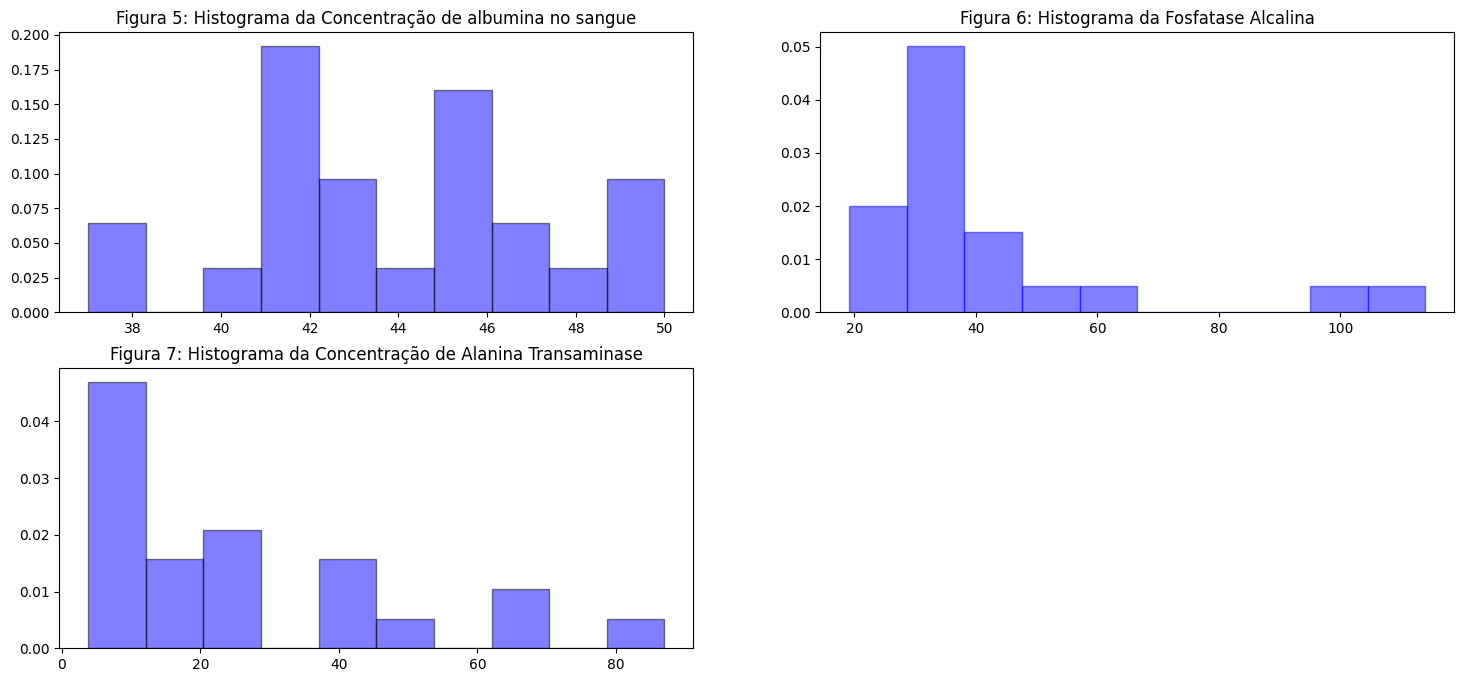

In [ ]:
plt.figure(figsize = (18,8))

plt.subplot(2,2,1)
plt.hist(data = df_hepatite_c,x ='ALB', color='blue', histtype='bar', rwidth=2, edgecolor='black', density = True, alpha = .5)
plt.title('Figura 5: Histograma da Concentração de albumina no sangue')
#Construção da Curva Normal
#sns.kdeplot(datasetDiabets['concentracao de glicose após duas horas'].dropna(), color='black')


plt.subplot(2,2,2)
plt.hist(data = df_hepatite_c, x ='ALP', color='blue', histtype='bar', rwidth=2, edgecolor='blue', density = True, alpha = .5)
plt.title('Figura 6: Histograma da Fosfatase Alcalina')
#Construção da Curva Normal
#sns.kdeplot(datasetDiabets['concentracao de glicose após duas horas'].dropna(), color='black')


plt.subplot(2,2,3)
plt.hist(data = df_hepatite_c,x ='ALT', color='blue', histtype='bar', rwidth=2, edgecolor='black', density = True, alpha = .5)
plt.title('Figura 7: Histograma da Concentração de Alanina Transaminase')
#Construção da Curva Normal
#sns.kdeplot(datasetDiabets['concentracao de glicose após duas horas'].dropna(), color='black')





plt.show()

### * Interpretação dos Resultados: Dos entrevistados que participaram da pesquisa, 61,3% são do sexo masculino e apenas 38,7% são do sexo feminino.
### Também é possível observar a concentração de Albumina conforme mostra Figura 5: 'Histograma da Concentração de albumina no sangue'

## **Estatística Descritiva**

### Medidas de Posição

In [ ]:
df.describe()

,Unnamed: 0.1,Unnamed: 0,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
count,615.000000,615.000000,615.000000,614.000000,597.000000,614.000000,615.000000,615.000000,615.000000,605.000000,615.000000,615.000000,614.000000
mean,307.000000,308.000000,47.408130,41.620195,68.283920,28.450814,34.786341,11.396748,8.196634,5.368099,81.287805,39.533171,72.044137
std,177.679487,177.679487,10.055105,5.780629,26.028315,25.469689,33.090690,19.673150,2.205657,1.132728,49.756166,54.661071,5.402636
min,0.000000,1.000000,19.000000,14.900000,11.300000,0.900000,10.600000,0.800000,1.420000,1.430000,8.000000,4.500000,44.800000
25%,153.500000,154.500000,39.000000,38.800000,52.500000,16.400000,21.600000,5.300000,6.935000,4.610000,67.000000,15.700000,69.300000
50%,307.000000,308.000000,47.000000,41.950000,66.200000,23.000000,25.900000,7.300000,8.260000,5.300000,77.000000,23.300000,72.200000
75%,460.500000,461.500000,54.000000,45.200000,80.100000,33.075000,32.900000,11.200000,9.590000,6.060000,88.000000,40.200000,75.400000
max,614.000000,615.000000,77.000000,82.200000,416.600000,325.300000,324.000000,254.000000,16.410000,9.670000,1079.100000,650.900000,90.000000


In [ ]:
df[['Age', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT']].describe()

,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
count,615.000000,614.000000,597.000000,614.000000,615.000000,615.000000,615.000000,605.000000,615.000000,615.000000,614.000000
mean,47.408130,41.620195,68.283920,28.450814,34.786341,11.396748,8.196634,5.368099,81.287805,39.533171,72.044137
std,10.055105,5.780629,26.028315,25.469689,33.090690,19.673150,2.205657,1.132728,49.756166,54.661071,5.402636
min,19.000000,14.900000,11.300000,0.900000,10.600000,0.800000,1.420000,1.430000,8.000000,4.500000,44.800000
25%,39.000000,38.800000,52.500000,16.400000,21.600000,5.300000,6.935000,4.610000,67.000000,15.700000,69.300000
50%,47.000000,41.950000,66.200000,23.000000,25.900000,7.300000,8.260000,5.300000,77.000000,23.300000,72.200000
75%,54.000000,45.200000,80.100000,33.075000,32.900000,11.200000,9.590000,6.060000,88.000000,40.200000,75.400000
max,77.000000,82.200000,416.600000,325.300000,324.000000,254.000000,16.410000,9.670000,1079.100000,650.900000,90.000000


In [ ]:
df_hepatite_c.describe()

,Unnamed: 0.1,Unnamed: 0,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
count,24.000000,24.000000,24.000000,24.000000,21.000000,23.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.00000
mean,551.500000,552.500000,38.708333,43.833333,42.114286,26.900000,75.733333,15.625000,9.283750,5.099167,73.958333,92.579167,74.70000
std,7.071068,7.071068,11.350078,3.509821,23.517935,22.594488,68.780335,13.467554,2.506341,1.448774,19.767231,116.668538,6.07976
min,540.000000,541.000000,19.000000,37.000000,19.100000,3.800000,16.700000,5.000000,5.750000,3.090000,45.400000,11.500000,63.00000
25%,545.750000,546.750000,31.500000,41.750000,31.200000,10.350000,38.025000,7.750000,7.405000,4.122500,61.625000,34.075000,71.05000
50%,551.500000,552.500000,37.000000,43.500000,34.600000,15.200000,47.200000,13.000000,9.510000,5.060000,72.250000,45.550000,73.65000
75%,557.250000,558.250000,47.000000,46.250000,39.600000,39.550000,82.250000,16.250000,10.147500,5.797500,81.275000,90.825000,77.07500
max,563.000000,564.000000,61.000000,50.000000,114.000000,87.000000,324.000000,67.000000,16.410000,9.670000,147.300000,491.000000,90.00000


## Média - data.mean()

In [ ]:
mediaTodos = round(df[['Age', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT']].mean(),2)

In [ ]:
mediaTodos

,0
Age,47.41
ALB,41.62
ALP,68.28
ALT,28.45
AST,34.79
BIL,11.40
CHE,8.20
CHOL,5.37
CREA,81.29
GGT,39.53


In [ ]:
# Média dos indicadores das pessoas com Hepatite

mediaTodosHep = round(df_hepatite_c[['Age', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT']].mean(),2)
mediaTodosHep

,0
Age,38.71
ALB,43.83
ALP,42.11
ALT,26.90
AST,75.73
BIL,15.62
CHE,9.28
CHOL,5.10
CREA,73.96
GGT,92.58


## Mediana - data.median()

In [ ]:
df[['Age', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT']].median()

,0
Age,47.00
ALB,41.95
ALP,66.20
ALT,23.00
AST,25.90
BIL,7.30
CHE,8.26
CHOL,5.30
CREA,77.00
GGT,23.30


In [ ]:
# Mediana dos indicadores das pessoas com Hepatite

df_hepatite_c[['Age', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT']].median()

,0
Age,37.00
ALB,43.50
ALP,34.60
ALT,15.20
AST,47.20
BIL,13.00
CHE,9.51
CHOL,5.06
CREA,72.25
GGT,45.55


## Moda - data.mode()

In [ ]:
df[['Age', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT']].mode()

,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,46.0,39.0,52.5,16.6,22.0,6.0,7.52,5.07,74.0,13.0,71.9
1,NaN,NaN,61.2,NaN,23.9,NaN,NaN,5.10,NaN,14.5,NaN
2,NaN,NaN,NaN,NaN,24.3,NaN,NaN,NaN,NaN,19.1,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.1,NaN


In [ ]:
# Moda dos indicadores das pessoas com Hepatite

df_hepatite_c[['Age', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT']].mode()

,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,32.0,45.0,34.4,3.8,39.0,7.0,5.75,3.2,45.4,11.5,70.1
1,38.0,NaN,NaN,7.4,NaN,14.0,5.95,NaN,55.2,18.9,71.1
2,41.0,NaN,NaN,8.2,NaN,NaN,6.00,NaN,56.6,22.3,NaN
3,50.0,NaN,NaN,9.0,NaN,NaN,6.88,NaN,57.7,24.7,NaN
4,NaN,NaN,NaN,9.4,NaN,NaN,7.08,NaN,58.8,27.6,NaN
5,NaN,NaN,NaN,10.2,NaN,NaN,7.09,NaN,60.8,33.1,NaN
6,NaN,NaN,NaN,10.5,NaN,NaN,7.51,NaN,61.9,34.4,NaN
7,NaN,NaN,NaN,11.6,NaN,NaN,7.55,NaN,62.0,35.9,NaN
8,NaN,NaN,NaN,12.1,NaN,NaN,8.77,NaN,66.4,37.0,NaN
9,NaN,NaN,NaN,12.2,NaN,NaN,8.79,NaN,66.9,40.2,NaN


## Desvio - data.std()

In [ ]:
desvioTodos = df[['Age', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT']].std()
desvioTodos

,0
Age,10.055105
ALB,5.780629
ALP,26.028315
ALT,25.469689
AST,33.090690
BIL,19.673150
CHE,2.205657
CHOL,1.132728
CREA,49.756166
GGT,54.661071


In [ ]:
desvioTodosHep = df_hepatite_c[['Age', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT']].std()
desvioTodosHep

,0
Age,11.350078
ALB,3.509821
ALP,23.517935
ALT,22.594488
AST,68.780335
BIL,13.467554
CHE,2.506341
CHOL,1.448774
CREA,19.767231
GGT,116.668538


# Medidas de Dispersão

## Variância - data.var

In [ ]:
df[['Age', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT']].var()

,0
Age,101.105146
ALB,33.415676
ALP,677.473197
ALT,648.705048
AST,1094.993787
BIL,387.032823
CHE,4.864924
CHOL,1.283074
CREA,2475.676056
GGT,2987.832709


In [ ]:
# Variância dos indicadores das pessoas com Hepatite

df_hepatite_c[['Age', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT']].var()

,0
Age,128.824275
ALB,12.318841
ALP,553.093286
ALT,510.510909
AST,4730.734493
BIL,181.375000
CHE,6.281746
CHOL,2.098947
CREA,390.743406
GGT,13611.547808


## Coeficiente de Variação - (Desvio/Média) * 100

In [ ]:
(desvioTodos/mediaTodos)*100

,0
Age,21.208828
ALB,13.889066
ALP,38.119970
ALT,89.524390
AST,95.115523
BIL,172.571490
CHE,26.898259
CHOL,21.093639
CREA,61.208225
GGT,138.277438


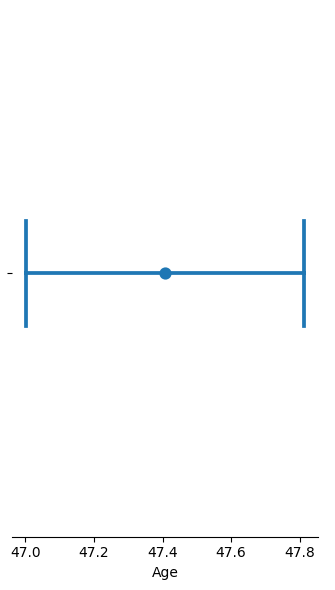

In [ ]:
grafico = sns.catplot(data=df, x='Age',capsize=.2, errorbar="se",kind="point", height=6, aspect=.55)
grafico.despine(left=True)

## Percentis - data.quantile(.25, .50, .75)

In [ ]:
df[['Age', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT']].quantile([.25,.50,.75])

,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0.25,39.0,38.80,52.5,16.400,21.6,5.3,6.935,4.61,67.0,15.7,69.3
0.50,47.0,41.95,66.2,23.000,25.9,7.3,8.260,5.30,77.0,23.3,72.2
0.75,54.0,45.20,80.1,33.075,32.9,11.2,9.590,6.06,88.0,40.2,75.4


Significa dizer que:


*   25% dos avaliados têm até 39 anos
*   50% dos avaliados têm até 47 anos
*   75% dos avaliados têm até 54 anos
   

*   25% dos avaliados têm até 38.80 de teor de Albumina no sangue
*   50% dos avaliados têm até 41.95 de teor de Albumina no sangue
*   75% dos avaliados têm até 45.20 de teor de Albumina no sangue
   

*   25% dos avaliados têm até 69.30 de teor de Proteína no sangue  
*   50% dos avaliados têm até 72.20 de teor de Proteína no sangue
*   75% dos avaliados têm até 75.40 de teor de Proteína no sangue  



---



# BoxPlot

In [ ]:
IQ1=df['Age'].quantile(0.25)-1.5*(df['Age'].quantile(0.75)-df['Age'].quantile(0.25))
IQ2=df['Age'].quantile(0.75)+1.5*(df['Age'].quantile(0.75)-df['Age'].quantile(0.25))

[IQ1,IQ2]

[16.5, 76.5]

In [ ]:
df['Age'].quantile([.25, .50, .75])

,Age
0.25,39.0
0.50,47.0
0.75,54.0


Significa dizer que do grupo total de avaliados:

*   25% dos analisados têm até 39 anos
*   50% dos analisados têm até 47 anos
*   75% dos analisados têm 54 anos ou menos
*   25% dos analisados têm mais que 54 anos

In [ ]:
df_hepatite_c['Age'].quantile([.25, .50, .75])

,Age
0.25,31.5
0.50,37.0
0.75,47.0


Significa dizer que do grupo de avaliados que possuem Hepatite C:

*   25% dos analisados têm aproximadamente até 32 anos
*   50% dos analisados têm até 37 anos
*   75% dos analisados têm 47 anos ou menos
*   25% dos analisados têm mais que 47 anos

In [ ]:
# Máximo e mínimo das idades das pessoas avaliadas

maximo=max(df['Age'])
minimo=min(df['Age'])
[minimo, maximo]

[19, 77]

Significa dizer que do grupo total de avaliados:

*   a idade máxima é até 77 anos
*   a idade mínima é até 19 anos

In [ ]:
# Máximo e mínimo das idades das pessoas com Hepatite C

maximo=max(df_hepatite_c['Age'])
minimo=min(df_hepatite_c['Age'])
[minimo, maximo]

[19, 61]

Significa dizer que do grupo de avaliados que tem Hepatite C:

*   a idade máxima é até 61 anos
*   a idade mínima é até 19 anos

## Análise Bivariada

### Variáveis Qualitativas

In [ ]:
# Classificação do Sexo x Tipo de Doador

CroosSexDoa = pd.crosstab(df.Sex, df.Category, margins = True)
CroosSexDoa

Category,0=Blood Donor,0s=suspect Blood Donor,1=Hepatitis,2=Fibrosis,3=Cirrhosis,All
Sex,,,,,,
f,215,1,4,8,10,238
m,318,6,20,13,20,377
All,533,7,24,21,30,615


### Variáveis Quantitativas

In [ ]:
df['Age'].corr(df['PROT'])

-0.1536676080168093

In [ ]:
df['Age'].corr(df['ALB'])

-0.19749844215123055

In [ ]:
df['Age'].corr(df['ALP'])

0.17334015543461329

In [ ]:
df['ALB'].corr(df['CREA'])

-0.001573244199466387

In [ ]:
df['GGT'].corr(df['CREA'])

0.12100332637043681

In [ ]:
df['ALT'].corr(df['AST'])

0.27332563092120576

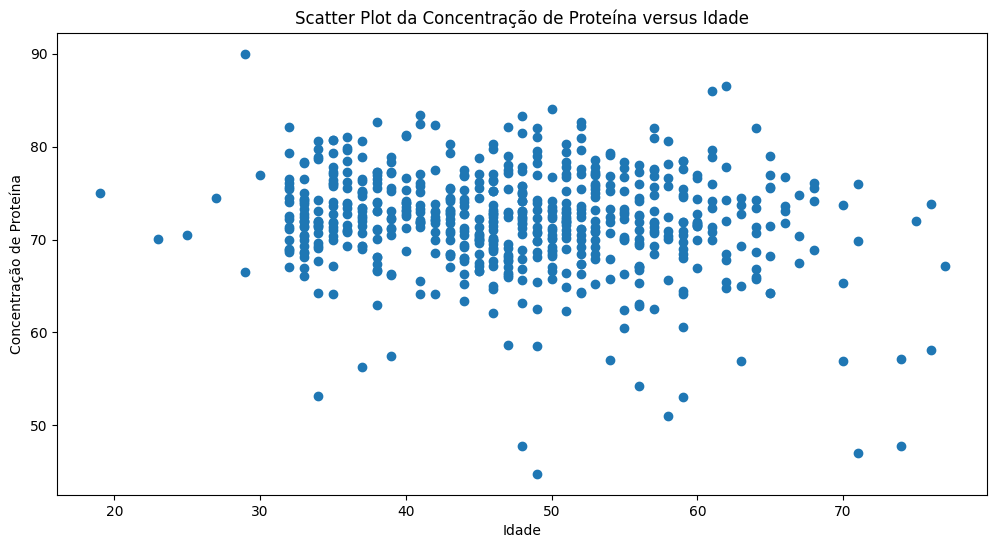

In [ ]:
#Scatter Plot da Concentração de Proteína versus Idade

plt.figure(figsize = [12, 6])
plt.scatter('Age', 'PROT', data = df)
plt.title('Scatter Plot da Concentração de Proteína versus Idade')
plt.xlabel('Idade')
plt.ylabel('Concentração de Proteína')
plt.show()

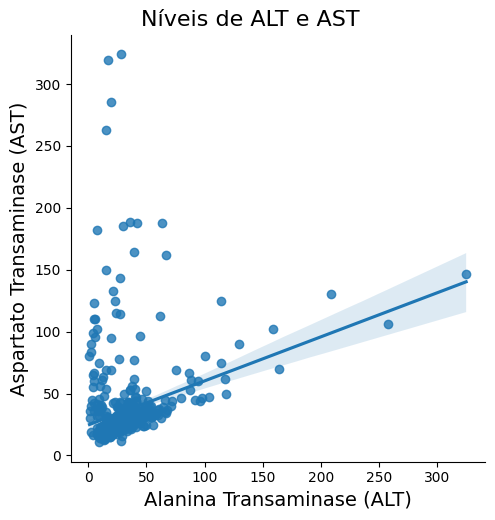

In [ ]:
ax = sns.lmplot(x="ALT", y="AST", data=df)
ax.fig.set_size_inches(5, 5)
ax.fig.suptitle('Níveis de ALT e AST', fontsize=16, y=1.02)
ax.set_xlabels("Alanina Transaminase (ALT)", fontsize=14)
ax.set_ylabels("Aspartato Transaminase (AST)", fontsize=14)
ax

## Correlação

In [ ]:
df['ALB'].corr(df['PROT'])

0.5571969118282855

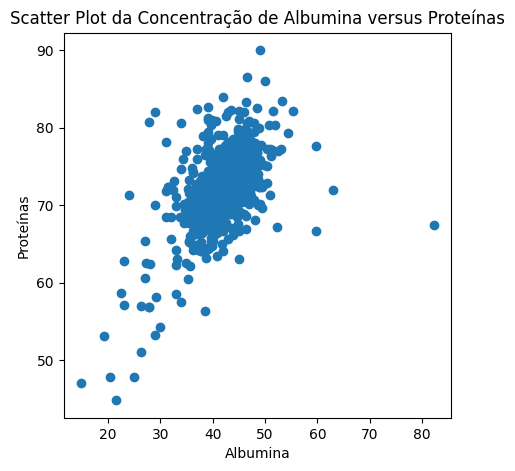

In [ ]:
# Scatter Plot da Concentração de Albumina versus Proteínas

plt.figure(figsize = [5,5])
plt.scatter('ALB', 'PROT', data=df)
plt.title('Scatter Plot da Concentração de Albumina versus Proteínas')
plt.ylabel('Proteínas')
plt.xlabel('Albumina')
plt.show()

# **Inferência Estatística**

## Teste de Hipóteses

Hipótese nula (H0):

Hipótese alternativa (H1):

Nível de significância(α):

**Rejeitar H0, se p-valor < alpha**

### Suposição:


*   A variável de estudo tem que ter distribuição normal.




## Teste de Média

## Teste de Normalidade

 - Verificando a Normalidade das variáveis do banco:

  H0: A variável possui distribuição normal

  H1: A variável não possui distribuição normal


In [ ]:
pg.normality(df, method='normaltest').round(3)

,W,pval,normal
Unnamed: 0.1,411.090,0.000,False
Unnamed: 0,411.090,0.000,False
Age,12.832,0.002,False
ALB,88.546,0.000,False
ALP,641.100,0.000,False
ALT,708.567,0.000,False
AST,642.527,0.000,False
BIL,913.362,0.000,False
CHE,20.312,0.000,False
CHOL,21.378,0.000,False


### Não foi encontrado variáveis que possuam uma distribução normal no Banco Geral dos avaliados, pois o p-valor < 0.05. Então, filtrei apenas os avaliados com Hepatite C para verificação de variáveis com distribuição normal.

In [ ]:
pg.normality(df_hepatite_c, method='normaltest').round(3)

,W,pval,normal
Unnamed: 0.1,4.934,0.085,True
Unnamed: 0,4.934,0.085,True
Age,1.062,0.588,True
ALB,0.161,0.922,True
ALP,21.571,0.000,False
ALT,7.200,0.027,False
AST,27.601,0.000,False
BIL,34.484,0.000,False
CHE,6.860,0.032,False
CHOL,11.272,0.004,False


## **Interpretação:**

*   Idade
*   Teor de Albumina
*   Qtd de Proteínas

Possuem Distribuição Normal, sendo o p-valor > 0.05.

As demais variáveis não possuem distribuição normal.



## Construindo gráficos para verificação da Normalidade

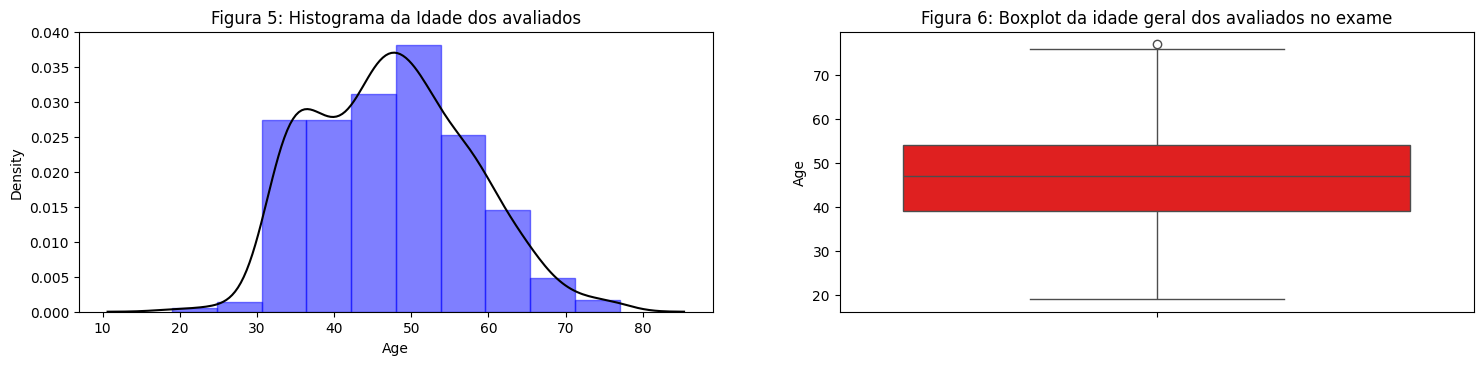

In [ ]:
#Gráficos para verificar normalidade do grupo geral dos avaliados - Idade

plt.figure(figsize = (18,8))

plt.subplot(2,2,1)
plt.hist(data = df, x ='Age', color='blue', histtype='bar', rwidth=2, edgecolor='blue', density = True, alpha = .5)
plt.title('Figura 5: Histograma da Idade dos avaliados')
#Construção da Curva Normal
sns.kdeplot(df['Age'].dropna(), color='black')


plt.subplot(2,2,2)
sns.boxplot(y = 'Age', data = df, color='red')
plt.title('Figura 6: Boxplot da idade geral dos avaliados no exame')


plt.show()

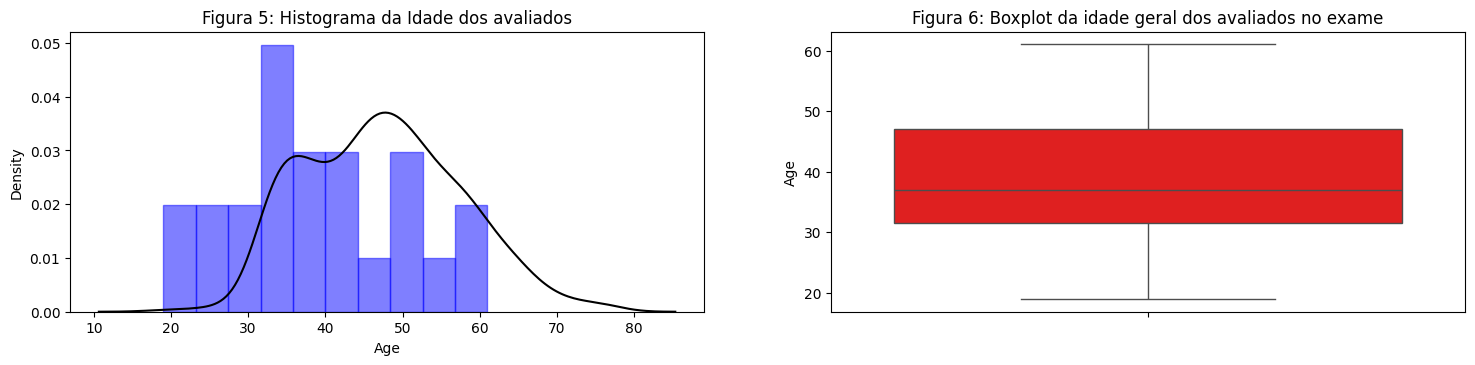

In [ ]:
#Gráficos para verificar normalidade do grupo dos avaliados que possuem Hepatite C - Idade

plt.figure(figsize = (18,8))

plt.subplot(2,2,1)
plt.hist(data = df_hepatite_c, x ='Age', color='blue', histtype='bar', rwidth=2, edgecolor='blue', density = True, alpha = .5)
plt.title('Figura 5: Histograma da Idade dos avaliados')
#Construção da Curva Normal
sns.kdeplot(df['Age'].dropna(), color='black')


plt.subplot(2,2,2)
sns.boxplot(y = 'Age', data = df_hepatite_c, color='red')
plt.title('Figura 6: Boxplot da idade geral dos avaliados no exame')


plt.show()

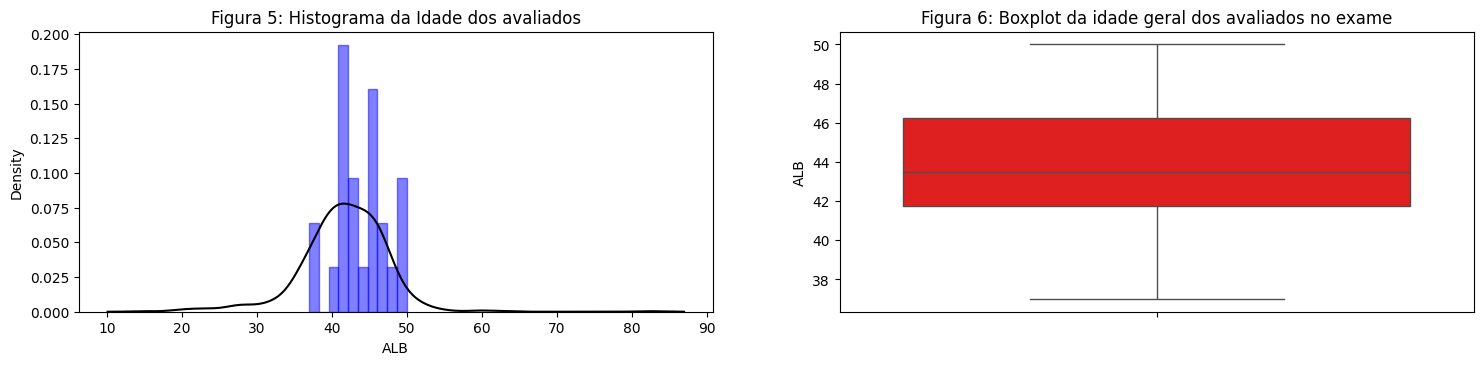

In [ ]:
#Gráficos para verificar normalidade do grupo dos avaliados que possuem Hepatite C - Albumina

plt.figure(figsize = (18,8))

plt.subplot(2,2,1)
plt.hist(data = df_hepatite_c, x ='ALB', color='blue', histtype='bar', rwidth=2, edgecolor='blue', density = True, alpha = .5)
plt.title('Figura 5: Histograma da Idade dos avaliados')
#Construção da Curva Normal
sns.kdeplot(df['ALB'].dropna(), color='black')


plt.subplot(2,2,2)
sns.boxplot(y = 'ALB', data = df_hepatite_c, color='red')
plt.title('Figura 6: Boxplot da idade geral dos avaliados no exame')


plt.show()

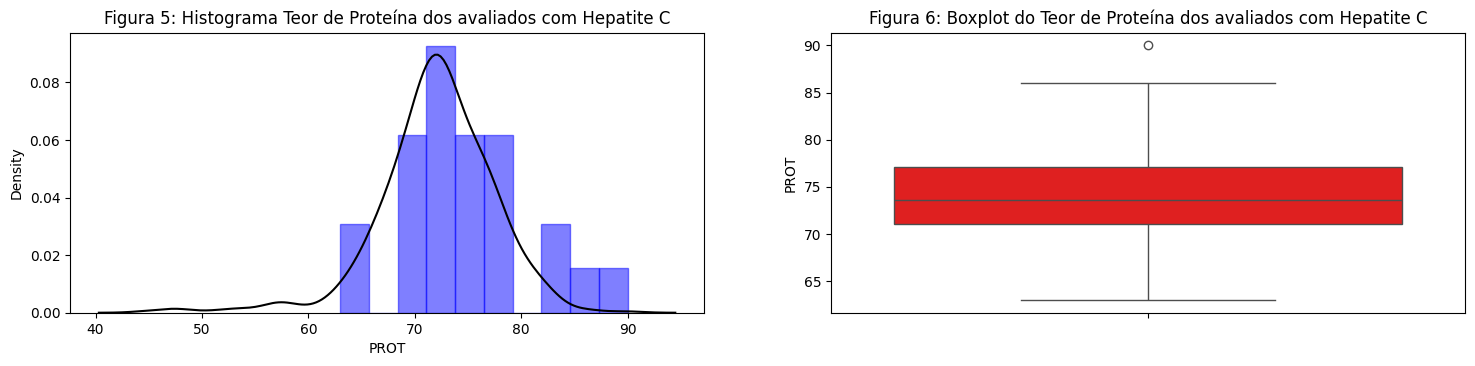

In [ ]:
#Gráficos para verificar normalidade do grupo dos avaliados que possuem Hepatite C - Proteína

plt.figure(figsize = (18,8))

plt.subplot(2,2,1)
plt.hist(data = df_hepatite_c, x ='PROT', color='blue', histtype='bar', rwidth=2, edgecolor='blue', density = True, alpha = .5)
plt.title('Figura 5: Histograma Teor de Proteína dos avaliados com Hepatite C')
#Construção da Curva Normal
sns.kdeplot(df['PROT'].dropna(), color='black')


plt.subplot(2,2,2)
sns.boxplot(y = 'PROT', data = df_hepatite_c, color='red')
plt.title('Figura 6: Boxplot do Teor de Proteína dos avaliados com Hepatite C')


plt.show()

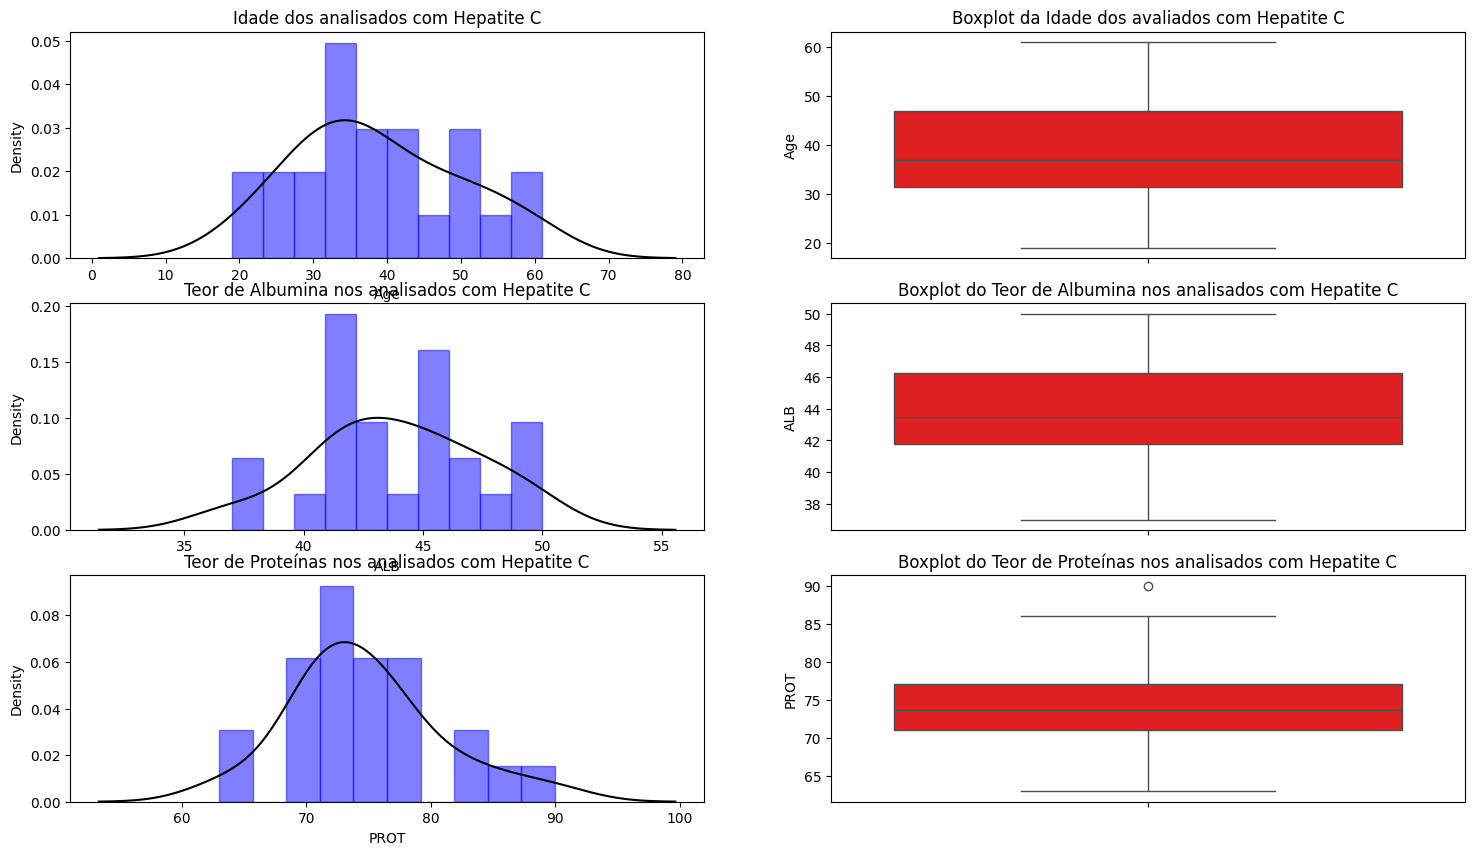

In [ ]:
plt.figure(figsize = (18,10))

plt.subplot(3,2,1)
plt.hist(data = df_hepatite_c, x ='Age', color='blue', histtype='bar', rwidth=2, edgecolor='blue', density = True, alpha = .5)
plt.title('Idade dos analisados com Hepatite C')
#Construção da Curva Normal
sns.kdeplot(df_hepatite_c['Age'].dropna(), color='black')


plt.subplot(3,2,2)
sns.boxplot(y = 'Age', data = df_hepatite_c, color='red')
plt.title('Boxplot da Idade dos avaliados com Hepatite C')


plt.subplot(3,2,3)
plt.hist(data = df_hepatite_c,x ='ALB', color='blue', histtype='bar', rwidth=2, edgecolor='blue', density = True, alpha = .5)
plt.title('Teor de Albumina nos analisados com Hepatite C')
#Construção da Curva Normal
sns.kdeplot(df_hepatite_c['ALB'].dropna(), color='black')



plt.subplot(3,2,4)
sns.boxplot(y = 'ALB', data = df_hepatite_c, color='red')
plt.title('Boxplot do Teor de Albumina nos analisados com Hepatite C')


plt.subplot(3,2,5)
plt.hist(data = df_hepatite_c,x ='PROT', color='blue', histtype='bar', rwidth=2, edgecolor='blue', density = True, alpha = .5)
plt.title('Teor de Proteínas nos analisados com Hepatite C')
#Construção da Curva Normal
sns.kdeplot(df_hepatite_c['PROT'].dropna(), color='black')



plt.subplot(3,2,6)
sns.boxplot(y = 'PROT', data = df_hepatite_c, color='red')
plt.title('Boxplot do Teor de Proteínas nos analisados com Hepatite C')

plt.show()



Interpretação:

*   Idade
*   Teor de Albumina
*   Qtd de Proteínas

Possuem Distribuição Normal no grupo de avaliados que possuem Hepatite C, sendo o p-valor > 0.05.

As demais variáveis não possuem distribuição normal.

Salvando o banco de avaliados com hepatite C após a verificação da normalidade.

In [ ]:
df_hepatite_c.to_csv('/content/drive/MyDrive/HepatitisC.csv')

### Gráfico QQ-plot também utilizado para verificar a distribuição normal

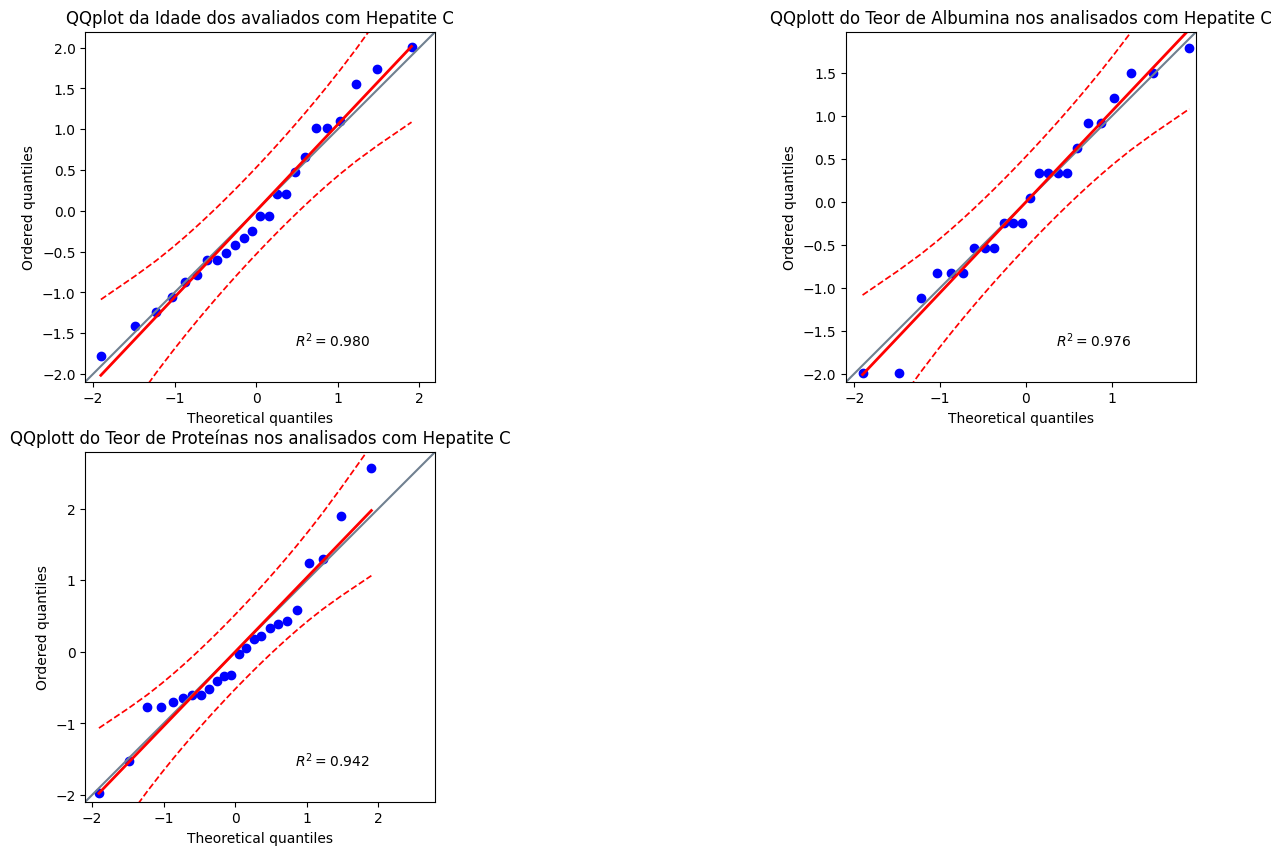

In [ ]:
#Gráficos para verificar normalidade do grupo dos avaliados que possuem Hepatite C

plt.figure(figsize = (18,10))

plt.subplot(2,2,1)
pg.qqplot(df_hepatite_c['Age'], dist='norm')
plt.title('QQplot da Idade dos avaliados com Hepatite C')


plt.subplot(2,2,2)
pg.qqplot(df_hepatite_c['ALB'], dist='norm')
plt.title('QQplott do Teor de Albumina nos analisados com Hepatite C')

plt.subplot(2,2,3)
pg.qqplot(df_hepatite_c['PROT'], dist='norm')
plt.title('QQplott do Teor de Proteínas nos analisados com Hepatite C')



plt.show()

# Teste T de Student

In [ ]:
from pingouin import ttest

In [ ]:
df_hepatite_c['Age'].mean()

38.708333333333336

In [ ]:
df_hepatite_c['Age'].std()

11.350078209524321

In [ ]:
df_hepatite_c.shape

(24, 16)

In [ ]:
ttest(df_hepatite_c['Age'], df_hepatite_c.shape[0]-1)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,6.780112,23,two-sided,6.477510e-07,"[33.92, 43.5]",1.383985,2.67e+04,0.999997


Hipótese nula (H0): Média da Idade dos avaliados com Hepatite C NÃO é significativa (M = 0)

Hipótese alternativa (H1): Média da Idade dos avaliados é significativa (M Diferente de 0)

tteste(df_hepatite_c['Age'], n-1)

 A Idade dos avaliados com hepatite C não é significante.

# **Teste-t Para Duas Amostras**
* Pressuposto: Normalidade da variável e Homogeneidade das Variâncias dos grupos

### Separando as Amostras para o Teste

In [ ]:
filtro1  = df['CATCategory'] == 'Doador'
filtro2  = df['CATCategory'] == 'Hepatite'
filtro3  = df['CATCategory'] == 'Fibrose'
filtro4  = df['CATCategory'] == 'Cirrose'
Doador = df[filtro1]
Hepatite = df[filtro2]
Fibrose = df[filtro3]
Cirrose = df[filtro4]

In [ ]:
# Desvio Padrão dos Grupos - Albumina

[[Doador['ALB'].mean(), Doador['ALB'].std()],[Hepatite['ALB'].mean(),Hepatite['ALB'].std()], [Fibrose['ALB'].mean(),Fibrose['ALB'].std()], [Cirrose['ALB'].mean(),Cirrose['ALB'].std()]]

[[42.23827392120075, 5.034769934490273],
 [43.833333333333336, 3.5098205908151696],
 [41.76190476190476, 3.7403844976788396],
 [32.48275862068966, 5.816360482387912]]

In [ ]:
# Desvio Padrão dos Grupos - Proteína

[[Doador['PROT'].mean(), Doador['PROT'].std()],[Hepatite['PROT'].mean(),Hepatite['PROT'].std()],  [Fibrose['PROT'].mean(),Fibrose['PROT'].std()], [Cirrose['PROT'].mean(),Cirrose['PROT'].std()]]

[[72.11125703564728, 4.550504486984286],
 [74.7, 6.079759720652583],
 [76.1, 5.046979294588001],
 [70.05172413793103, 7.929899147694807]]

In [ ]:
# Desvio Padrão dos Grupos - Idade

[[Doador['Age'].mean(), Doador['Age'].std()],[Hepatite['Age'].mean(),Hepatite['Age'].std()],  [Fibrose['Age'].mean(),Fibrose['Age'].std()], [Cirrose['Age'].mean(),Cirrose['Age'].std()]]

[[47.131332082551594, 9.62363228776903],
 [38.708333333333336, 11.350078209524321],
 [52.333333333333336, 11.438239957848994],
 [53.46666666666667, 8.908474591097507]]

In [ ]:
# Teste de Barllet - Idade

stats.bartlett(Doador['Age'], Hepatite['Age'], Fibrose['Age'], Cirrose['Age'])

BartlettResult(statistic=2.8936179391301797, pvalue=0.4083196821763616)

In [ ]:
# Teste de Barllet - Albumina

stats.bartlett(Doador['ALB'], Hepatite['ALB'], Fibrose['ALB'], Cirrose['ALB'])

BartlettResult(statistic=nan, pvalue=nan)

In [ ]:
# Teste de Barllet - Proteína

stats.bartlett(Doador['PROT'], Hepatite['PROT'], Fibrose['PROT'], Cirrose['PROT'])

BartlettResult(statistic=nan, pvalue=nan)

### Interpretação: A variância do teor de Albumina no sangue de pacientes doadores saudáveis é parecida com o teor dos que possuem Hepatite C, dos que possuem Fibrose e dos que possuem Cirrose (pvalue=0.032008231818956664), ao nível de 5% de significância.

### Interpretação: A variância do teor de Proteína no sangue de pacientes doadores saudáveis é parecida dos que possuem Hepatite C, Fibrose e/ou Cirrose (pvalue=7.181284124764345e-06), ao nível de 5% de significância.

### Interpretação: A variância da Idade de pacientes doadores saudáveis difere dos que possuem Hepatite C, Fibrose e/ou Cirrose (pvalue=0.4083196821763616), ao nível de 5% de significância.

In [ ]:
# Desvio Padrão dos Grupos - Proteína

[[Doador['PROT'].mean(), Doador['PROT'].std()],[Hepatite['PROT'].mean(),Hepatite['PROT'].std()],  [Fibrose['PROT'].mean(),Fibrose['PROT'].std()], [Cirrose['PROT'].mean(),Cirrose['PROT'].std()]]

[[72.11125703564728, 4.550504486984286],
 [74.7, 6.079759720652583],
 [76.1, 5.046979294588001],
 [70.05172413793103, 7.929899147694807]]

# **Realizando o Teste T para duas Amostras**

### * O teste T compara se a média de dois grupos são parecidas.
### * A opção alternative = 'greater', verifica se a média do primeiro grupo é maior do que a do segundo grupo.

### * Na opção paired = False, é informado se é a mesma amostra comparada em dois momentos diferentes. Se false indica que são duas amostras diferentes, e se True é a mesma amostra observada em dois momentos.

*Se* p-valor < 0.05, rejeitamos H0

* H0: A média do teor de proteína dos doadores é parecida com a dos que possuem hepatite.


* H1: A média do teor de proteína dos que possuem hepatite é maior.

In [ ]:
ttest(Hepatite['PROT'], Doador['PROT'], paired=False, alternative='greater')

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,2.060149,24.174317,greater,0.025152,"[0.44, inf]",0.559857,2.845,0.849633


## Interpretação:

Os analisados com Hepatite C possuem o teor de proteína bem próximo ao Teor dos doadores saudáveis (p-valor = 0.025152), ao nível de 5% de significância. O mesmo será demonstrado através do gráfico boxplot

In [ ]:
ttest(Doador['PROT'], Cirrose['PROT'], paired=False, alternative='greater')

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,1.386258,29.011825,greater,0.088115,"[-0.46, inf]",0.431171,0.954,0.730274


## Interpretação:

Os doadores saudáveis possuem o teor de proteína maior do que o Teor dos avaliados que têm cirrose (p-valor = 0.088115), ao nível de 5% de significância.
O mesmo será demonstrado através do gráfico boxplot

In [ ]:
ttest(Fibrose['PROT'], Cirrose['PROT'], paired=False, alternative='greater')

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,3.289175,47.345898,greater,0.00095,"[2.96, inf]",0.879474,36.827,0.916327


## Interpretação:

Os analisados com Fibrose possuem o teor de proteína maior do que o Teor dos avaliados que têm fibrose (p-valor = 0.00095), ao nível de 5% de significância.
O mesmo será demonstrado através do gráfico boxplot

Os gráficos a seguir demonstram as diferenças existentes.

<ipython-input-86-c26769dda8ce>:3: UserWarning: 
The palette list has fewer values (2) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(x= 'CATCategory', y = 'PROT', data = df, hue='CATCategory', linewidth=4, palette=["m", "g"])


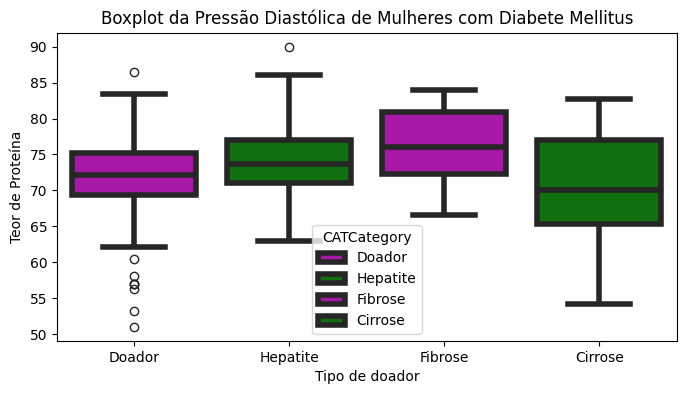

In [ ]:
plt.figure(figsize = (8,4))

sns.boxplot(x= 'CATCategory', y = 'PROT', data = df, hue='CATCategory', linewidth=4, palette=["m", "g"])
plt.xlabel('Tipo de doador')
plt.ylabel('Teor de Proteína')
plt.title('Boxplot da Pressão Diastólica de Mulheres com Diabete Mellitus')

plt.show()

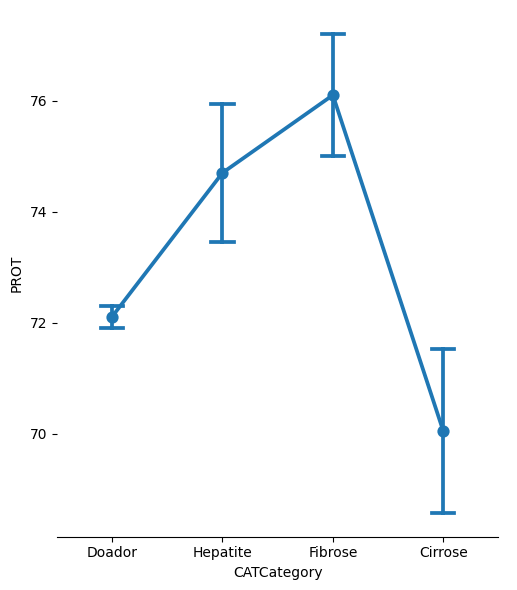

In [ ]:
g = sns.catplot(data=df, x='CATCategory', y="PROT", capsize=.2,  errorbar="se",kind="point", height=6, aspect=.85,)
g.despine(left=True)
#g.set_titles("Gráfico de Média das Mulheres com Diabete Mellitus")

In [ ]:
df['CATCategory'].value_counts()

,count
CATCategory,
Doador,533
Cirrose,30
Hepatite,24
Fibrose,21


## **Teste Análise de Variância (ANOVA)**

Utilizada para comparar a variável de interesse com uma ou mais variáveis categóricas

### Pressupostos:

### - Variável resposta possui distribuição normal
### - Homogeneidade das variâncias (variâncias parecidas)
### - Amostras independentes.

In [ ]:
df_hepatite_c = pd.read_csv('/content/drive/MyDrive/HepatitisC.csv')

### **Teste Homogeneidade das Variâncias***

HO: A variância do teor de proteína dos doadores saudáveis é igual ao dos que possuem algum tipo de doença(dentre as analisadas).

H1: Pelo menos uma comparação difere.

In [ ]:
stats.bartlett(Doador['PROT'], Cirrose['PROT'], Hepatite['PROT'], Fibrose['PROT'])

BartlettResult(statistic=nan, pvalue=nan)

### ***Interpretação:***

A variância do teor de proteína difere em pelo menos uma comparação dentre os avaliados (pvalue = 7.181284124764345e-06 < 0,05). É possível também observar através do Boxplot abaixo, que a variabilidade entre os grupos de avaliados (Doadores, Hepáticos e com Fibrose) o teor de proteína é parecida apesar de que a variabilidade dos avaliados que têm Cirrose ser menor porém não diferente estatisticamente das demais.

<ipython-input-91-1ad27f612967>:3: UserWarning: 
The palette list has fewer values (3) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(x= 'CATCategory', y = 'PROT', data = df, hue='CATCategory', linewidth=4, palette=["m", "g", "r"])


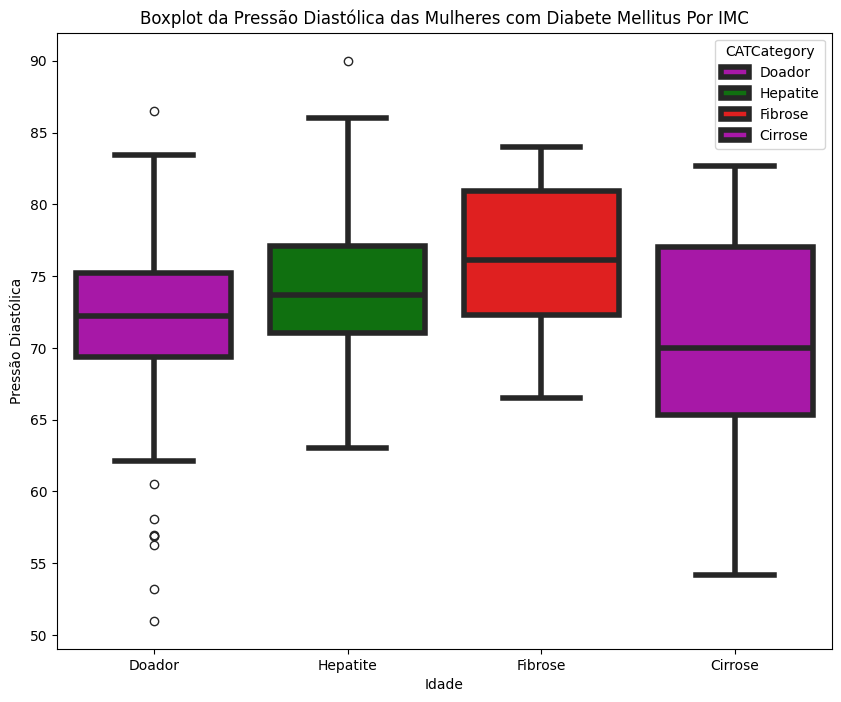

In [ ]:
plt.figure(figsize = (10,8))

sns.boxplot(x= 'CATCategory', y = 'PROT', data = df, hue='CATCategory', linewidth=4, palette=["m", "g", "r"])
plt.xlabel('Idade')
plt.ylabel('Pressão Diastólica')
plt.title('Boxplot da Pressão Diastólica das Mulheres com Diabete Mellitus Por IMC')

plt.show()

In [ ]:
data=[list(Doador['Age']), list(Cirrose['Age']), list(Hepatite['Age']), list(Fibrose['Age'])]
pg.homoscedasticity(data, method="bartlett")


,T,pval,equal_var
bartlett,2.893618,0.40832,True


In [ ]:
pg.homoscedasticity(data, method= "levene")

,W,pval,equal_var
levene,0.548379,0.649397,True


### *** Teste ANOVA***

HO: O teor médio de Albumina não difere entre os avaliados.

H1: Pelo menos uma média difere.

In [ ]:
ANOVA = df.anova(dv='ALB', between=['CATCategory'])
ANOVA

,Source,ddof1,ddof2,F,p-unc,np2
0,CATCategory,3,603,36.443539,1.179611e-21,0.153483


<ipython-input-95-025dc75714ec>:1: UserWarning: 
The palette list has fewer values (3) than needed (4) and will cycle, which may produce an uninterpretable plot.
  g = sns.catplot(data=df, x="CATCategory", y="ALB", hue="CATCategory",


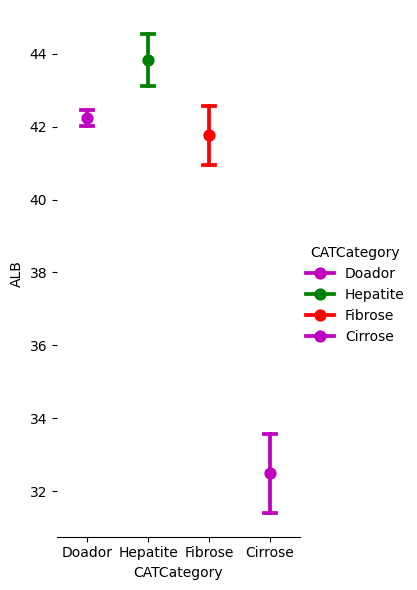

In [ ]:
g = sns.catplot(data=df, x="CATCategory", y="ALB", hue="CATCategory",
    capsize=.2, errorbar="se", palette=["m", "g", "r"], kind="point", height=6, aspect=.55,)
g.despine(left=True)#

### ***Interpretação:***

Assim como o teor de proteínas, através do teste ANOVA é possível verificar que o teor de Albumina no sangue dos avaliados (Doador saudável, Hepático e Fibrose) não diferem estatisticamente. Porém, é possível observar no gráfico que há diferença nos avaliados que possuem Cirrose.